In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [4]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

In [7]:
df = pd.read_csv('adult.data', header=None, names = col_names)

- age: continuous

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

- sex: Female, Male

- capital-gain: continuous

- capital-loss: continuous

- hours-per-week: continuous

- native country: discrete

- income: discrete, >50K, <=50K

In [12]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
#Distribution of income
df['income'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

In [16]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [32]:
# trim all the empty spaces in object columns

for col in df.columns:
    if df[col].dtypes==object:
        df[col] = df[col].str.strip()
        

# for c in df.select_dtypes(include=['object']).columns:
#     df[c] = df[c].str.strip()
    



age               False
workclass          True
fnlwgt            False
education          True
education-num     False
marital-status     True
occupation         True
relationship       True
race               True
sex                True
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income             True
dtype: bool

In [40]:
categorical_features = [col for col in df.columns if df[col].dtype==object]
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [45]:
# Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex','race']
X = pd.get_dummies(df[feature_cols], drop_first=True)
X

,age,capital-gain,capital-loss,hours-per-week,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,2174,0,40,1,0,0,0,1
1,50,0,0,13,1,0,0,0,1
2,38,0,0,40,1,0,0,0,1
3,53,0,0,40,1,0,1,0,0
4,28,0,0,40,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
32556,27,0,0,38,0,0,0,0,1
32557,40,0,0,40,1,0,0,0,1
32558,58,0,0,40,0,0,0,0,1
32559,22,0,0,20,1,0,0,0,1


In [44]:
#Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k

y = np.where(df.income=='<=50K', 0, 1)

In [46]:
#Split data into a train and test set

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)

In [48]:
#Instantiate random forest classifier, fit and score with default parameters

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

print(f'Accuracy score for default random forest: {round(rf.score(x_test, y_test)*100,3)}%')

Accuracy score for default random forest: 82.067%


In [50]:
#Tune the hyperparameter max_depth over a range from 1-25, save scores for test and train set

np.random.seed(0)
accuracy_train = []
accuracy_test = []

depths = range(1,26)

for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))

In [51]:
#Find the best accuracy and at what depth that occurs

best_accuracy = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved when depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_accuracy*100,3)}%')

The highest accuracy on the test is achieved when depth: 12
The highest accuracy on the test set is: 83.464%


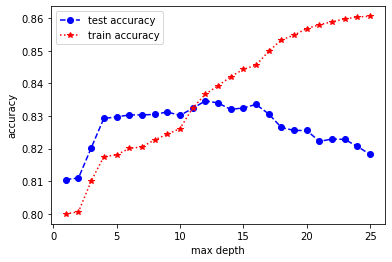

In [53]:
# plot the training and testing accuracy of the model 

plt.figure(2)
plt.plot(depths, accuracy_test, 'bo--')
plt.plot(depths, accuracy_train, 'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

In [54]:
# refit the model using the "best" max_depth
# save important features
#Save the best model and print the two features with the new feature set

best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_),  columns=['feature', 'importance'])
print('Top 5 random forest features:')
print(feature_imp_df.sort_values('importance', ascending=False).iloc[0:5])

Top 5 random forest features:
          feature  importance
1    capital-gain    0.370119
0             age    0.248969
3  hours-per-week    0.140480
2    capital-loss    0.140439
4        sex_Male    0.078258


In [55]:
# bin the education level instead of using dummies

pd.cut(df['education-num'], [0,9,13,16], labels=['HS or less', 'College to Bachelors', 'Masters or more'])

0        College to Bachelors
1        College to Bachelors
2                  HS or less
3                  HS or less
4        College to Bachelors
                 ...         
32556    College to Bachelors
32557              HS or less
32558              HS or less
32559              HS or less
32560              HS or less
Name: education-num, Length: 32561, dtype: category
Categories (3, object): [HS or less < College to Bachelors < Masters or more]

In [70]:
X['education'] = pd.cut(df['education-num'], [0,9,13,16], labels=['HS or less', 'College to Bachelors', 'Masters or more'])
X.head()

,age,capital-gain,capital-loss,hours-per-week,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,education
0,39,2174,0,40,1,0,0,0,1,College to Bachelors
1,50,0,0,13,1,0,0,0,1,College to Bachelors
2,38,0,0,40,1,0,0,0,1,HS or less
3,53,0,0,40,1,0,1,0,0,HS or less
4,28,0,0,40,0,0,1,0,0,College to Bachelors


In [71]:
X['edu_num'] = df['education-num']

In [72]:
X.drop(columns=['edu_num'], inplace=True)
X.head()

,age,capital-gain,capital-loss,hours-per-week,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,education
0,39,2174,0,40,1,0,0,0,1,College to Bachelors
1,50,0,0,13,1,0,0,0,1,College to Bachelors
2,38,0,0,40,1,0,0,0,1,HS or less
3,53,0,0,40,1,0,1,0,0,HS or less
4,28,0,0,40,0,0,1,0,0,College to Bachelors


In [73]:
# train new model using the new featuers
X = pd.get_dummies(X, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)

In [74]:
X.head()

,age,capital-gain,capital-loss,hours-per-week,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,education_College to Bachelors,education_Masters or more
0,39,2174,0,40,1,0,0,0,1,1,0
1,50,0,0,13,1,0,0,0,1,1,0
2,38,0,0,40,1,0,0,0,1,0,0
3,53,0,0,40,1,0,1,0,0,0,0
4,28,0,0,40,0,0,1,0,0,1,0


In [75]:
np.random.seed(0)
accuracy_train = []
accuracy_test = []

depths = range(1,26)

for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))

In [76]:
#Find the best accuracy and at what depth that occurs

best_accuracy = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved when depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_accuracy*100,3)}%')

The highest accuracy on the test is achieved when depth: 12
The highest accuracy on the test set is: 84.984%


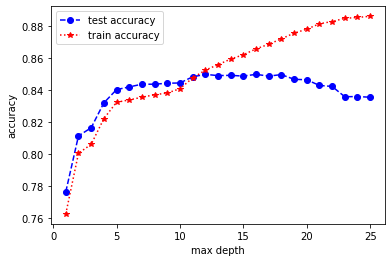

In [77]:
# plot the training and testing accuracy of the model 

plt.figure(2)
plt.plot(depths, accuracy_test, 'bo--')
plt.plot(depths, accuracy_train, 'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

In [78]:
# refit the model using the "best" max_depth
# save important features
#Save the best model and print the two features with the new feature set

best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_),  columns=['feature', 'importance'])
print('Top 5 random forest features:')
print(feature_imp_df.sort_values('importance', ascending=False).iloc[0:5])

Top 5 random forest features:
                      feature  importance
1                capital-gain    0.298577
0                         age    0.212668
3              hours-per-week    0.123395
10  education_Masters or more    0.114162
2                capital-loss    0.104100
